# Ambiente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif, mutual_info_classif

# Carregamento dos Dados

In [2]:
# Carregar o dataset enviado
df = pd.read_csv('https://viagens-ml.s3.sa-east-1.amazonaws.com/dataset_viagens_brasil.csv')

In [3]:
df.head()

,Idade,Cidade_Origem,Custo_Desejado,Prefere_Praia,Prefere_Natureza,Prefere_Cultura,Prefere_Festas,Prefere_Gastronomia,Prefere_Compras,Cidade_Destino
0,23.0,Campo Grande,9000.0,4,3.0,1,5.0,1.0,3,Porto Seguro
1,33.0,Rio Branco,NaN,4,5.0,3,5.0,5.0,5,Balneário Camboriú
2,46.0,Rio Branco,2900.0,5,4.0,5,4.0,2.0,2,Porto Seguro
3,20.0,São Luís,2900.0,5,3.0,4,3.0,5.0,4,Porto Seguro
4,37.0,Teresina,1700.0,3,3.0,4,2.0,1.0,1,Fernando de Noronha


In [4]:
df.shape

(20000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                19503 non-null  float64
 1   Cidade_Origem        20000 non-null  object 
 2   Custo_Desejado       19503 non-null  float64
 3   Prefere_Praia        20000 non-null  object 
 4   Prefere_Natureza     19600 non-null  float64
 5   Prefere_Cultura      20000 non-null  object 
 6   Prefere_Festas       19600 non-null  float64
 7   Prefere_Gastronomia  19600 non-null  float64
 8   Prefere_Compras      20000 non-null  object 
 9   Cidade_Destino       20000 non-null  object 
dtypes: float64(5), object(5)
memory usage: 1.5+ MB


# Análise de Dados

In [6]:
colunas_numericas = ['Idade', 'Custo_Desejado', 'Prefere_Praia', 'Prefere_Natureza',
                     'Prefere_Cultura', 'Prefere_Festas', 'Prefere_Gastronomia', 'Prefere_Compras']

for coluna in colunas_numericas:
    if coluna in df.columns:
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce').astype('float64')

# Verificar os tipos resultantes
print(df.dtypes)

Idade                  float64
Cidade_Origem           object
Custo_Desejado         float64
Prefere_Praia          float64
Prefere_Natureza       float64
Prefere_Cultura        float64
Prefere_Festas         float64
Prefere_Gastronomia    float64
Prefere_Compras        float64
Cidade_Destino          object
dtype: object


In [7]:
df.isnull().sum()

Idade                  497
Cidade_Origem            0
Custo_Desejado         497
Prefere_Praia          400
Prefere_Natureza       400
Prefere_Cultura        400
Prefere_Festas         400
Prefere_Gastronomia    400
Prefere_Compras        400
Cidade_Destino           0
dtype: int64

In [8]:
df = df.dropna()

df.shape

(16852, 10)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Cidade_Destino'].unique()

array(['Porto Seguro', 'Fernando de Noronha', 'Balneário Camboriú',
       'João Pessoa', 'Jericoacoara', 'Macapá', 'Campo Grande', 'Paraty',
       'Gramado', 'Aracaju', 'Campos do Jordão', 'Porto Alegre',
       'Petrópolis', 'Boa Vista', 'Belém', 'Foz do Iguaçu', 'Fortaleza',
       'Belo Horizonte', 'São Paulo', 'Tiradentes', 'Rio Branco',
       'Cuiabá', 'Ouro Preto', 'Vitória', 'Salvador'], dtype=object)

In [11]:
df["Cidade_Destino"].value_counts()

Cidade_Destino
Macapá                 3308
Porto Seguro           2909
Paraty                 2485
Balneário Camboriú     1616
João Pessoa            1485
Jericoacoara           1406
Aracaju                1199
Campo Grande            818
Gramado                 530
Fernando de Noronha     416
Campos do Jordão        329
Foz do Iguaçu            76
Fortaleza                76
Petrópolis               56
Porto Alegre             39
Belém                    29
Belo Horizonte           21
Rio Branco               15
São Paulo                12
Boa Vista                 9
Tiradentes                6
Ouro Preto                4
Vitória                   4
Cuiabá                    2
Salvador                  2
Name: count, dtype: int64

## Agrupamento de Cidades Destino menores que 100 dados

In [12]:
limite = 100

contagem_cidades = df["Cidade_Destino"].value_counts()

cidades_para_agrupar = contagem_cidades[contagem_cidades < limite].index

mapeamento = {}
for cidade in cidades_para_agrupar:
    mapeamento[cidade] = 'Outras cidades'

df['Cidade_Destino'] = df['Cidade_Destino'].replace(mapeamento)

# Verificar o resultado
print("Agrupamento concluído!")
print("\nDistribuição atualizada de Cidade_Destino:")
print(df['Cidade_Destino'].value_counts().sort_values(ascending=False))

print(f"\nTotal de categorias: {len(df['Cidade_Destino'].value_counts())}")

Agrupamento concluído!

Distribuição atualizada de Cidade_Destino:
Cidade_Destino
Macapá                 3308
Porto Seguro           2909
Paraty                 2485
Balneário Camboriú     1616
João Pessoa            1485
Jericoacoara           1406
Aracaju                1199
Campo Grande            818
Gramado                 530
Fernando de Noronha     416
Outras cidades          351
Campos do Jordão        329
Name: count, dtype: int64

Total de categorias: 12


In [13]:
df["Cidade_Origem"].value_counts()

Cidade_Origem
João Pessoa       678
Belo Horizonte    665
Curitiba          662
Manaus            649
Porto Velho       647
Goiânia           644
Macapá            639
São Luís          639
Rio de Janeiro    637
Salvador          633
Recife            629
Florianópolis     625
Teresina          622
Belém             617
Aracaju           617
Rio Branco        616
Porto Alegre      612
Boa Vista         612
Natal             611
Vitória           611
Fortaleza         610
Brasília          605
Maceió            605
Campo Grande      604
Cuiabá            598
Palmas            591
São Paulo         574
Name: count, dtype: int64

In [14]:
df['Idade'].unique()

array([ 23.,  46.,  20.,  37.,  53.,  36.,  43.,  24.,  50.,  57.,  56.,
        35., 190.,  28.,  45.,  67.,  40.,  48.,  47.,  59.,  52.,  65.,
        66.,  19.,  18.,  29.,  54.,  49.,  26.,  58.,  33.,  41.,  69.,
        55.,  42.,  63.,  21.,  31.,  38.,  25.,  34.,  39.,  62.,  44.,
        22.,  61.,  70.,  64.,  60.,  30.,  68.,  32.,  51.,  27.])

In [15]:
def histogram(x, title, bins=40, kde=True, color='skyblue'):
    plt.figure(figsize=(10, 5))
    sns.histplot(x, bins=bins, kde=kde, color=color)
    plt.title(title)

    plt.show()
    plt.close()

## Histogramas

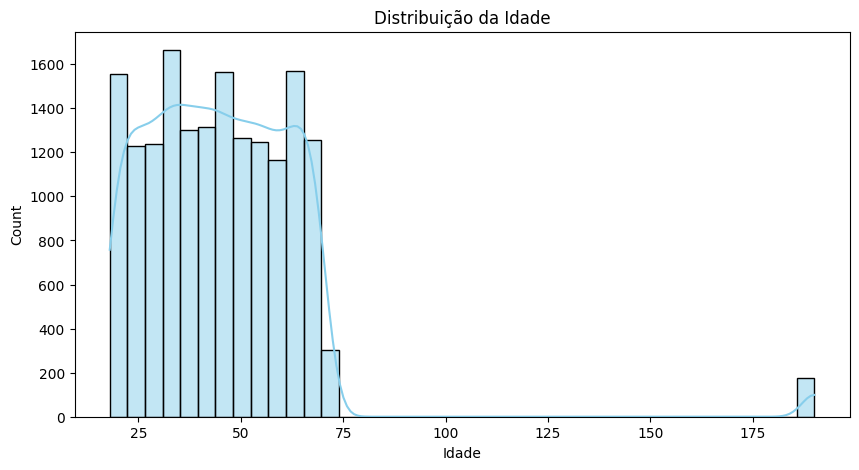

In [16]:
histogram(df['Idade'], "Distribuição da Idade", bins=40, kde=True, color="skyblue")

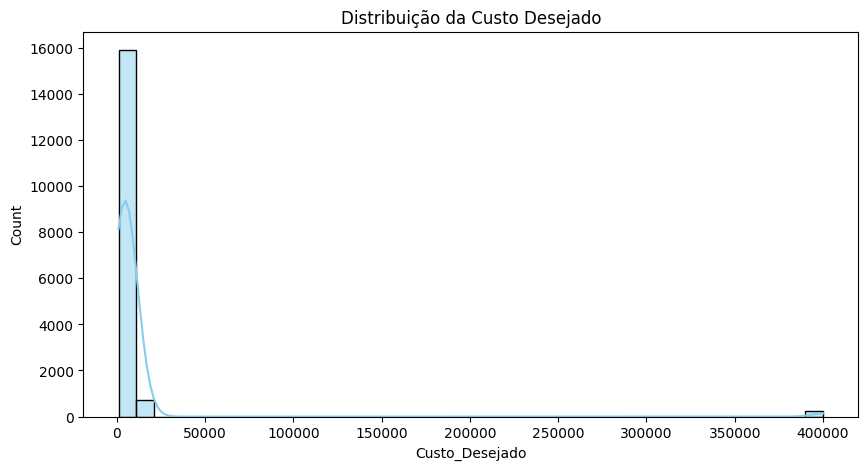

In [17]:
histogram(df['Custo_Desejado'], "Distribuição da Custo Desejado", bins=40, kde=True, color="skyblue")

## Boxplots

In [18]:
def boxplot(x, title):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    sns.boxplot(x=x)
    plt.show()
    plt.close()

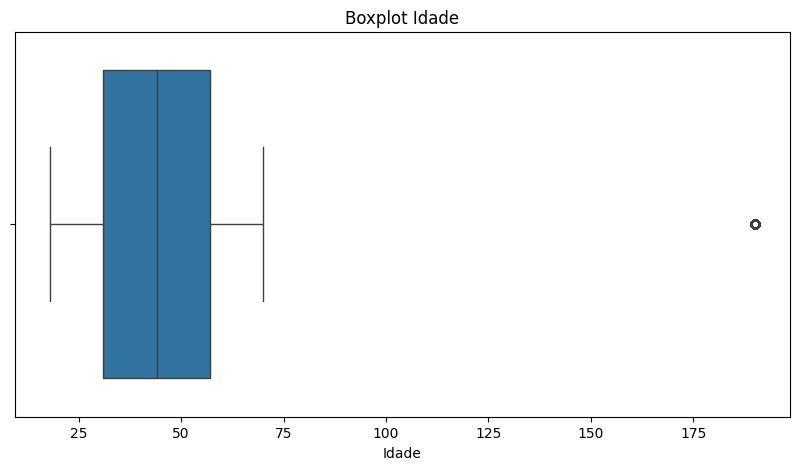

In [19]:
boxplot(x=df['Idade'], title='Boxplot Idade')

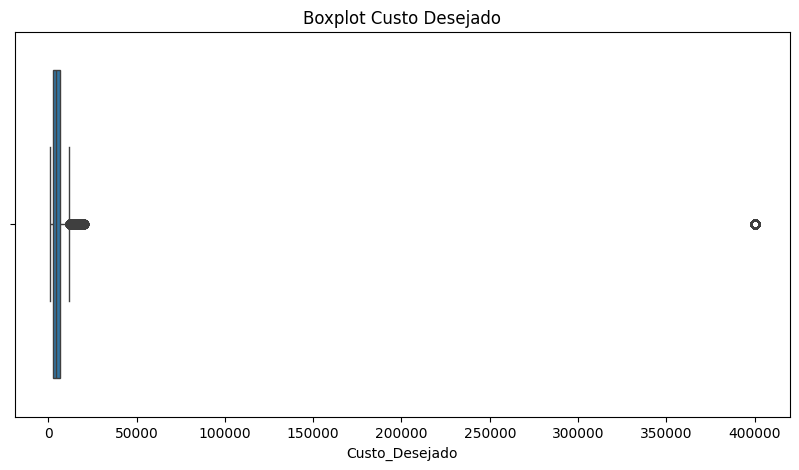

In [20]:
boxplot(x=df['Custo_Desejado'], title='Boxplot Custo Desejado')

## Gráficos de Barra

In [21]:
def barplot(data, xlabel, ylabel, title):
    # Gerar gráfico de barras com o value_counts de df['Prefere_Praia']
    plt.figure(figsize=(8,5))
    data.value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

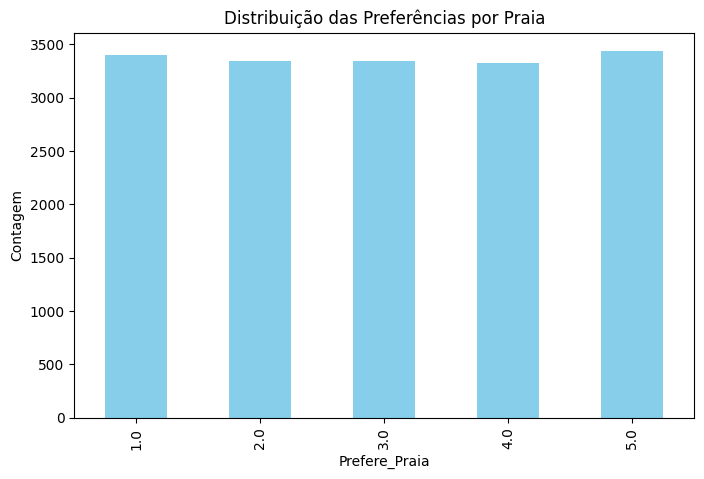

In [22]:
barplot(df['Prefere_Praia'], 'Prefere_Praia', 'Contagem', 'Distribuição das Preferências por Praia')

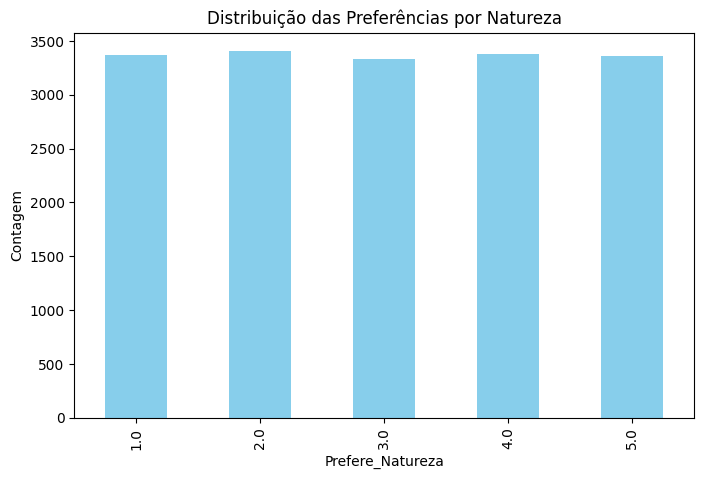

In [23]:
barplot(df['Prefere_Natureza'], 'Prefere_Natureza', 'Contagem', 'Distribuição das Preferências por Natureza')

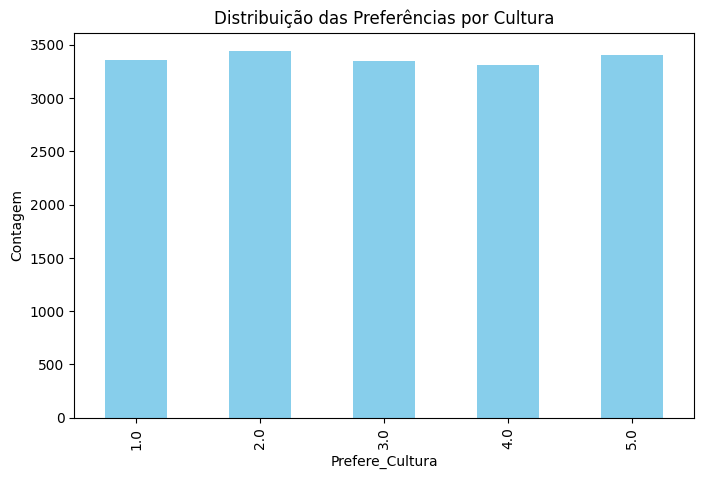

In [24]:
barplot(df['Prefere_Cultura'], 'Prefere_Cultura', 'Contagem', 'Distribuição das Preferências por Cultura')

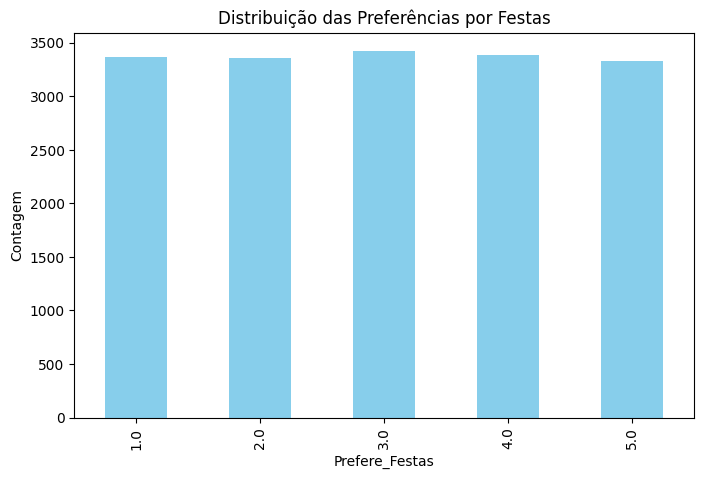

In [25]:
barplot(df['Prefere_Festas'], 'Prefere_Festas', 'Contagem', 'Distribuição das Preferências por Festas')

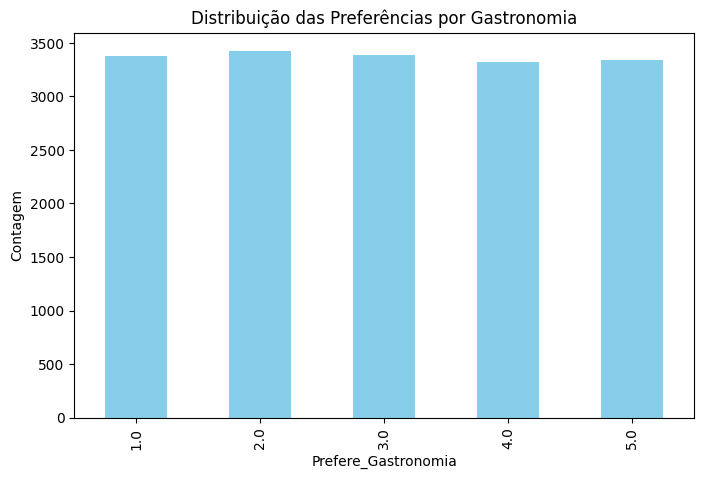

In [26]:
barplot(df['Prefere_Gastronomia'], 'Prefere_Gastronomia', 'Contagem', 'Distribuição das Preferências por Gastronomia')

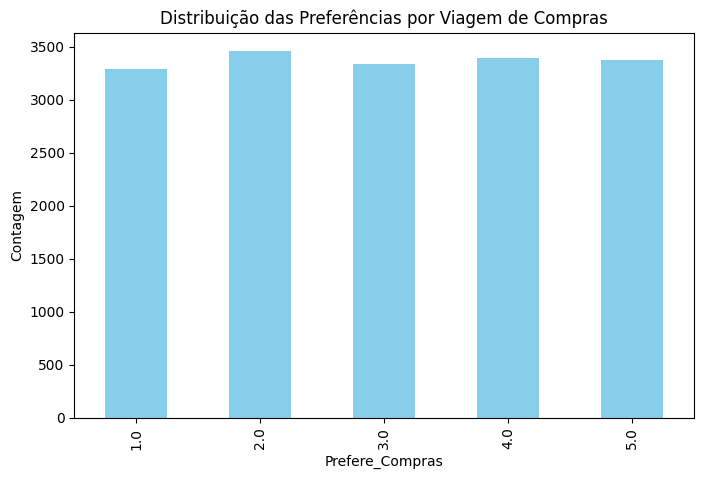

In [27]:
barplot(df['Prefere_Compras'], 'Prefere_Compras', 'Contagem', 'Distribuição das Preferências por Viagem de Compras')

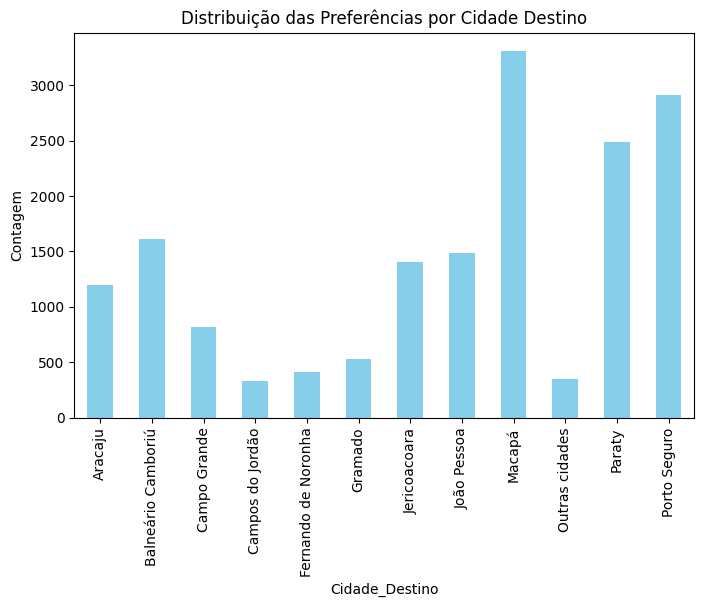

In [28]:
barplot(df['Cidade_Destino'], 'Cidade_Destino', 'Contagem', 'Distribuição das Preferências por Cidade Destino')

## Importância das Features

In [29]:
# Separate features (X) and target (y)
le = LabelEncoder()
df['Cidade_Origem'] = le.fit_transform(df['Cidade_Origem'])
X = df.drop(['Cidade_Destino'], axis=1)
y_str = df['Cidade_Destino']

# 2. Encode the string target variable
y_encoded = le.fit_transform(y_str)

# 3. Calculate ANOVA F-test scores
# Returns F-scores and p-values
f_scores, p_values = f_classif(X, y_encoded)

# 4. Calculate Mutual Information scores
mi_scores = mutual_info_classif(X, y_encoded)

# 5. Display the results
results = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'P-Value': p_values,
    'Mutual Information': mi_scores
})

# Sort by F-score for better readability
results_sorted = results.sort_values(by='F-Score', ascending=False).reset_index(drop=True)
print(results_sorted)

# You can see the original mapping
print("\nLabel Mapping:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name}: {i}")

               Feature     F-Score        P-Value  Mutual Information
0        Prefere_Praia  361.505261   0.000000e+00            0.121180
1      Prefere_Cultura  222.333098   0.000000e+00            0.077155
2      Prefere_Compras  139.099216  1.185933e-307            0.041600
3       Prefere_Festas   78.032706  1.739482e-172            0.026802
4  Prefere_Gastronomia   76.687317  1.850074e-169            0.027668
5     Prefere_Natureza   56.894175  1.028023e-124            0.006833
6                Idade    2.088640   1.787411e-02            0.005297
7       Custo_Desejado    1.635162   8.199963e-02            0.073377
8        Cidade_Origem    0.944701   4.955718e-01            0.000000

Label Mapping:
Aracaju: 0
Balneário Camboriú: 1
Campo Grande: 2
Campos do Jordão: 3
Fernando de Noronha: 4
Gramado: 5
Jericoacoara: 6
João Pessoa: 7
Macapá: 8
Outras cidades: 9
Paraty: 10
Porto Seguro: 11


In [30]:
df['Cidade_Destino'].unique()

array(['Porto Seguro', 'Fernando de Noronha', 'Balneário Camboriú',
       'João Pessoa', 'Jericoacoara', 'Macapá', 'Campo Grande', 'Paraty',
       'Gramado', 'Aracaju', 'Campos do Jordão', 'Outras cidades'],
      dtype=object)